# NLP_LAB_4
### Zaidan Mufaddhal_AIU20092029

## 1. Converting text or features using one hot encoding

### 1.1 Store the text in a variable

In [1]:
Text = " I am learning NLP"

### 1.2 Execute below function on the text data

In [2]:
import pandas as pd

In [3]:
pd.get_dummies(Text.split())

,I,NLP,am,learning
0,1,0,0,0
1,0,0,1,0
2,0,0,0,1
3,0,1,0,0


## 2. Converting text or features using count vectorizing

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
text = ["I love NLP and I will learn NLP in 2month"]

In [6]:
# create the transform
vectorizer = CountVectorizer()

In [7]:
# tokenizing
vectorizer.fit(text)

CountVectorizer()

In [8]:
# encode document
vector = vectorizer.transform(text)

In [9]:
# summrize & generate output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love': 4, 'nlp': 5, 'and': 1, 'will': 6, 'learn': 3, 'in': 2, '2month': 0}
[[1 1 1 1 1 2 1]]


## 3. Generating N-grams

### 3.1 Generating N-grams using TextBlob

In [10]:
Text = "I am learning NLP"

In [12]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.2 MB/s eta 0:00:00


In [13]:
# import textblob
from textblob import TextBlob

In [16]:
# for unigram : use n = 1
TextBlob(Text).ngrams(1)

[WordList(['I']), WordList(['am']), WordList(['learning']), WordList(['NLP'])]

In [20]:
# for Bigram : for bigrams, use n = 2
TextBlob(Text).ngrams(2)

[WordList(['I', 'am']),
 WordList(['am', 'learning']),
 WordList(['learning', 'NLP'])]

### 3.2 Bigram-based features for a document

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
text = ["I love NLP and I will learn NlP in 2mont"]

In [29]:
# create transform
vectorizer = CountVectorizer(ngram_range=(2,2))

In [30]:
# tokenizing
vectorizer.fit(text)

CountVectorizer(ngram_range=(2, 2))

In [31]:
# encode document
vector = vectorizer.transform(text)

In [32]:
# summarize & generate output
print(vectorizer.vocabulary_)
print(vector.toarray())

{'love nlp': 3, 'nlp and': 4, 'and will': 0, 'will learn': 6, 'learn nlp': 2, 'nlp in': 5, 'in 2mont': 1}
[[1 1 1 1 1 1 1]]


## 4. Hash vectorizing

### 4.1 Import the necessary libraries and create document

In [33]:
from sklearn.feature_extraction.text import HashingVectorizer

In [34]:
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]

### 4.2 Generate hash vectorizer matriux

In [35]:
# transform
vectorizer = HashingVectorizer(n_features=10)

In [36]:
# create the hashing vector
vector = vectorizer.transform(text)

In [37]:
# summarize the vector
print(vector.shape)
print(vector.toarray())

(1, 10)
[[ 0.          0.57735027  0.          0.          0.          0.
   0.         -0.57735027 -0.57735027  0.        ]]


## 5. Converting text or features using TF-IDF

### 5.1 read the text data

In [38]:
Text = ["The quick brown fox jumped over the lazy dog.",
       "The dog.",
       "The fox"]

### 5.2 Creating the features

In [39]:
# import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
# create the transform
vectorizer = TfidfVectorizer()

In [41]:
# tokenize and build vocab
vectorizer.fit(Text)

TfidfVectorizer()

In [43]:
# Summzarize
print(vectorizer.vocabulary_)
print(vectorizer.idf_)

{'the': 7, 'quick': 6, 'brown': 0, 'fox': 2, 'jumped': 3, 'over': 5, 'lazy': 4, 'dog': 1}
[1.69314718 1.28768207 1.28768207 1.69314718 1.69314718 1.69314718
 1.69314718 1.        ]


## 6. Implementing word embeddings

### a) Skip-Gram

In [3]:
# Example sentences
sentences = [['I', 'love,', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry',
            'problems'],
            ['nlp', 'uses', 'machine', 'learning']]

In [1]:
# import library
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [5]:
# training the model
skipgram = Word2Vec(sentences, size = 50, window = 3, min_count = 1, sg = 1)

In [6]:
print(skipgram)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [7]:
# access vector for one word
print(skipgram['nlp'])

[-0.00829562  0.00718735 -0.00864626  0.00956612  0.00856482  0.00497447
  0.00186863 -0.00549176  0.00625373 -0.00433542 -0.00397459  0.00323627
 -0.00603137 -0.00351389 -0.00085415  0.00421766  0.00324273  0.00100834
 -0.00486901  0.00260424 -0.00325732  0.00662305 -0.00487308  0.00331787
 -0.00171816  0.00965625  0.00876443  0.00483313  0.00323004 -0.00994119
 -0.00585145 -0.00952606  0.00159209 -0.00998649 -0.0068443  -0.00162539
 -0.00542441  0.00756326  0.00176823  0.00189319 -0.00291794  0.00631045
  0.00626539  0.00861473  0.00186216 -0.00401519 -0.00448781  0.00095126
 -0.00883184 -0.00627573]


C:\Users\zaida\AppData\Local\Temp\ipykernel_23724\411992577.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(skipgram['nlp'])


In [27]:
# access vector for another one word
print(skipgram['deep'])

C:\Users\zaida\AppData\Local\Temp\ipykernel_23724\164951190.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(skipgram['deep'])


KeyError: "word 'deep' not in vocabulary"

In [10]:
# save model
skipgram.save('skipgram.bin')

In [11]:
# load model
skipgram = Word2Vec.load('skipgram.bin')

In [13]:
# T - SNE plot
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\zaida\AppData\Local\Temp\ipykernel_23724\2787341041.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = skipgram[skipgram.wv.vocab]


<function matplotlib.pyplot.show(close=None, block=None)>

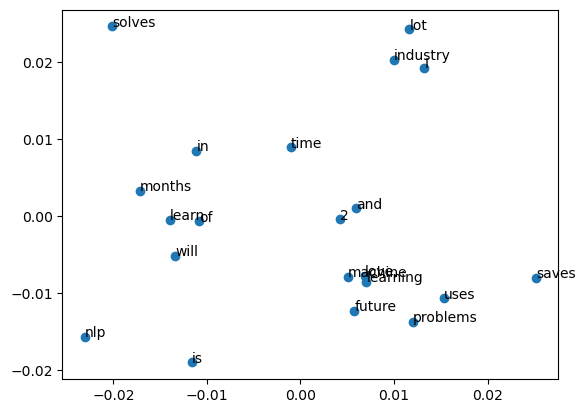

In [26]:
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(skipgram.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i,1]))
    
pyplot.show

### b) Continuous Bag of Words (CBOW)

In [15]:
# import library
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [16]:
# Example sentences
sentences = [['I', 'love,', 'nlp'],
            ['I', 'will', 'learn', 'nlp', 'in', '2', 'months'],
            ['nlp', 'is', 'future'],
            ['nlp', 'saves', 'time', 'and', 'solves', 'lot', 'of', 'industry',
            'problems'],
            ['nlp', 'uses', 'machine', 'learning']]

In [19]:
# training the model
cbow = Word2Vec(sentences, size=50, window=3, min_count=1, sg=1)
print(cbow)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [20]:
# access vector for one word
print(cbow['nlp'])

[-0.00829562  0.00718735 -0.00864626  0.00956612  0.00856482  0.00497447
  0.00186863 -0.00549176  0.00625373 -0.00433542 -0.00397459  0.00323627
 -0.00603137 -0.00351389 -0.00085415  0.00421766  0.00324273  0.00100834
 -0.00486901  0.00260424 -0.00325732  0.00662305 -0.00487308  0.00331787
 -0.00171816  0.00965625  0.00876443  0.00483313  0.00323004 -0.00994119
 -0.00585145 -0.00952606  0.00159209 -0.00998649 -0.0068443  -0.00162539
 -0.00542441  0.00756326  0.00176823  0.00189319 -0.00291794  0.00631045
  0.00626539  0.00861473  0.00186216 -0.00401519 -0.00448781  0.00095126
 -0.00883184 -0.00627573]


C:\Users\zaida\AppData\Local\Temp\ipykernel_23724\1604885524.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(cbow['nlp'])


In [21]:
# save model
cbow.save('cbow.bin')

In [22]:
# load model
cbow = Word2Vec.load('cbow.bin')

In [23]:
# T - SNE plot
X = cbow[cbow.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

C:\Users\zaida\AppData\Local\Temp\ipykernel_23724\2001626893.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = cbow[cbow.wv.vocab]


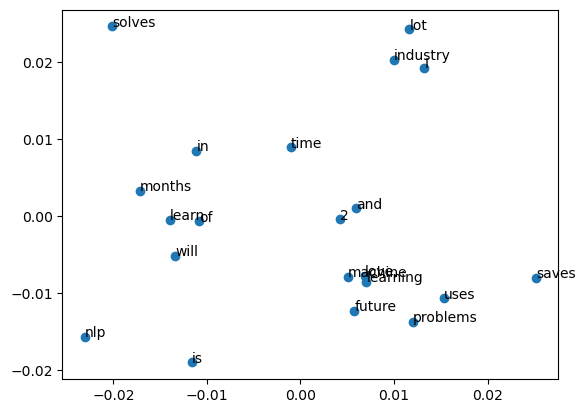

In [25]:
# create a scatter plot of the projection
pyplot.scatter(result[:,0], result[:,1])
words = list(cbow.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word,xy=(result[i,0], result[i,1]))

pyplot.show()